In [1]:
# Add Matplotlib inline magic command
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [3]:
# Read city data file into a DataFrame
city_data_df = pd.read_csv(city_data_to_load)
city_data_df.head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [4]:
# Read ride data into a Data Frame
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df.head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344
5,South Latoya,2019-03-11 12:26:48,9.52,1994999424437
6,New Paulville,2019-02-27 11:17:56,43.25,793208410091
7,Simpsonburgh,2019-04-26 00:43:24,35.98,111953927754
8,South Karenland,2019-01-08 03:28:48,35.09,7995623208694
9,North Jasmine,2019-03-09 06:26:29,42.81,5327642267789


In [5]:
# Inspect city data for: null values, driver count data type, data points per city type

#Get not-null columns and rows
city_data_df.count()


city            120
driver_count    120
type            120
dtype: int64

In [6]:
# count null coulumns
city_data_df.isnull().sum()

city            0
driver_count    0
type            0
dtype: int64

In [7]:
#Get data types for each column
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [8]:
#How many data points for each city type

#Get unique city types
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [9]:
sum(city_data_df["type"]=="Rural")

18

In [10]:
# Inspect ride DataFrame for nulls and check data types

# Get not-null rows and columns
ride_data_df.count()

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [11]:
# count null coulumns
ride_data_df.isnull().sum()

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [12]:
# get data types
ride_data_df.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [13]:
# combine the data frames
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city","city"])
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [14]:
#step 1: get the avg fare
#step 2: get the total rides
#step 3: get the avg driver count
#for efficiency, create separate data frames for each city type, then use to create series for each step

#create df for Urban cities
urban_cities_df = pyber_data_df[pyber_data_df["type"]=="Urban"]
# urban_cities_df.head()

#create df for Suburban cities
suburban_cities_df = pyber_data_df[pyber_data_df["type"]=="Suburban"]
# suburban_cities_df.head()

#create df for Rural cities
rural_cities_df = pyber_data_df[pyber_data_df["type"]=="Rural"]
# rural_cities_df.head()

In [15]:
#put the number of rides for urban cities into a Series
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# urban_ride_count.head()

#put the number of rides for suburban cities into a Series
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
# suburban_ride_count.head()

#put the number of rides for rural cities into a Series
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count.head()

city
Bradshawfurt      10
Garzaport          3
Harringtonfort     6
Jessicaport        6
Lake Jamie         6
Name: ride_id, dtype: int64

In [16]:
#put the avg fare for urban cities into a Series
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
urban_avg_fare.head()

#put the avg fare for suburban cities into a Series
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
# suburban_avg_fare.head()

#put the avg fare for rural cities into a Series
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]
# rural_avg_fare.head()

In [17]:
#put the avg urban driver count into a Series
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# urban_driver_count

#put the avg suburban driver count into a Series
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
# suburban_driver_count

# put the avg rural driver count into a Series
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count

city
Bradshawfurt         7.0
Garzaport            7.0
Harringtonfort       4.0
Jessicaport          1.0
Lake Jamie           4.0
Lake Latoyabury      2.0
Michaelberg          6.0
New Ryantown         2.0
Newtonview           1.0
North Holly          8.0
North Jaime          1.0
Penaborough          6.0
Randallchester       9.0
South Jennifer       7.0
South Marychester    1.0
South Saramouth      7.0
Taylorhaven          1.0
West Heather         4.0
Name: driver_count, dtype: float64

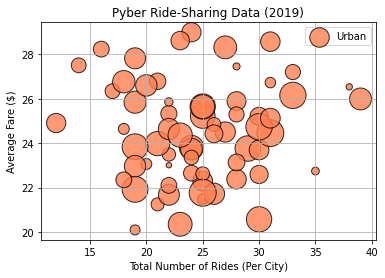

In [19]:
#create scatter plot where: x=num of rides/city, y=avg fare/city, size=avg drivers/city
#create individually then add to 1 chart

#build the scatter plots for urban cities
plt.scatter(urban_ride_count, 
            urban_avg_fare, 
            s=(urban_driver_count*10), 
            color="coral", 
            edgecolor="black",
            linewidths=1,
            alpha=0.8, 
            label="Urban")

plt.title("Pyber Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

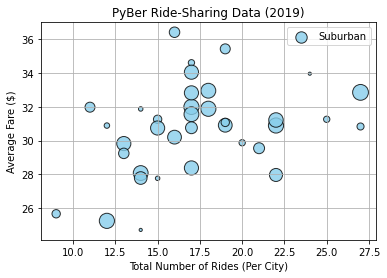

In [21]:
#build scatter plots for suburban cities
plt.scatter(suburban_ride_count,
           suburban_avg_fare,
           s=(10*suburban_driver_count),
           c="skyblue",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Suburban")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

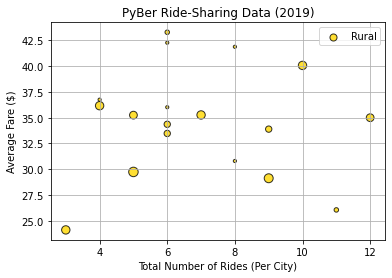

In [22]:
#build scatter plots for rural cities
plt.scatter(rural_ride_count,
           rural_avg_fare,
           s=(10*rural_driver_count),
           c="gold",
           edgecolor="black",
           linewidths=1,
           alpha=0.8,
           label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)

plt.legend()

TypeError: __init__() got an unexpected keyword argument 'fondsize'

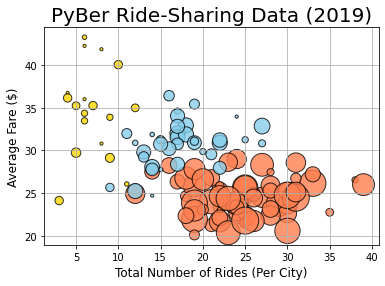

In [25]:
# Combine the scatter charts for each type of city.
plt.scatter(urban_ride_count,
      urban_avg_fare,
      s=10*urban_driver_count, c="coral",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Urban")

plt.scatter(suburban_ride_count,
      suburban_avg_fare,
      s=10*suburban_driver_count, c="skyblue",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count,
      rural_avg_fare,
      s=10*rural_driver_count, c="gold",
      edgecolor="black", linewidths=1,
      alpha=0.8, label="Rural")

# Incorporate the other graph properties
plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [75]
lgnd.legendHandles[1]._sizes = [75]
lgnd.legendHandles[2]._sizes = [75]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, "Note: Circle size correlates with driver count per city.", fontsize="12")

# Show the plot
plt.show()